## METHODS COMPARISON USING CIFAR100 WITH 50 CLASSES

On this file, the logistic regression proccess is done in order to compare it with the results of the Structure Predictions package. \
We find out that there are some considerable differences. 

For this exercice we use the CIFAR100 dataset provided by Keras. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes. 

In this file we do a subset of the dataset in order to have less categories. For this case, we implement a 50 categories subset as following.

In [1]:
from sklearn import metrics

In [2]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

import time


# Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
 
# Check the shape of the array
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)
 
# Number of data set samples 
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# Data format confirmation
print(type(X_test))
print(type(Y_test[0]))

2022-08-11 15:13:29.115553: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-11 15:13:29.120724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 15:13:29.120742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train samples
10000 test samples
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Organizing data

We just want the first 10 categories of the dataset, so that's why we create a new train dataset and test dataset with those labels as below

In [3]:
#   Subset for the CIFAR100 in order to have just 10 categories
#Training Dataset
sub_X_train = X_train[np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,
                                        17,18,19,20,21,22,23,24,25,26,27,28,29,
                                        30,31,32,33,34,35,36,37,38,39,40,
                                        41,42,43,44,45,46,47,48,49]).flatten()]
sub_Y_train = Y_train[np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,
                                        17,18,19,20,21,22,23,24,25,26,27,28,29,
                                        30,31,32,33,34,35,36,37,38,39,40,
                                        41,42,43,44,45,46,47,48,49]).flatten()]

#Test Dataset
sub_X_test = X_test[np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,
                                        17,18,19,20,21,22,23,24,25,26,27,28,29,
                                        30,31,32,33,34,35,36,37,38,39,40,
                                        41,42,43,44,45,46,47,48,49]).flatten()]
sub_Y_test = Y_test[np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,
                                        17,18,19,20,21,22,23,24,25,26,27,28,29,
                                        30,31,32,33,34,35,36,37,38,39,40,
                                        41,42,43,44,45,46,47,48,49]).flatten()]

In [10]:
print('Number of records for 50 classes X train',sub_X_train.shape)
print('Number of records for 50 classes X test',sub_X_test.shape)
print('Number of records for 50 classes Y train',sub_Y_train.shape)
print('Number of records for 50 classes Y test',sub_Y_test.shape)

Number of records for 50 classes X train (24500, 32, 32, 3)
Number of records for 50 classes X test (4900, 32, 32, 3)
Number of records for 50 classes Y train (24500, 1)
Number of records for 50 classes Y test (4900, 1)


In [6]:
print("First 5 entries of X_train",sub_X_train[0:5])
print("First 5 entries of X_test",sub_X_test[0:5])
print("First 5 entries of Y_train",sub_Y_train[0:5])
print("First 5 entries of Y_test",sub_Y_test[0:5])

First 5 entries of X_train [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
 

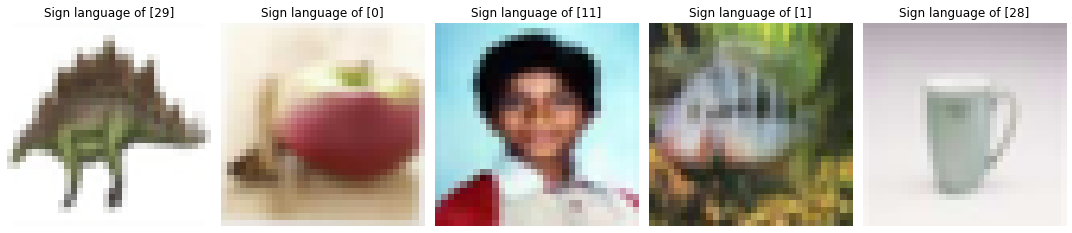

In [7]:
plt.figure(figsize=(15,5))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(sub_X_train[i,:,:],cmap='gray')
  plt.title('Sign language of {}'.format(sub_Y_train[i]))
  plt.axis('off')
  plt.tight_layout()
plt.show()

### Logistic Regression method

In [8]:
from sklearn.linear_model import LogisticRegression

For the Logistic Regression implementation, it's needed an X array with dimension <= 2. In this case, we have a dimension of 4, that's why we have to do a reshape as below

In [11]:
sub_X_test_or=sub_X_test
sub_X_train_or=sub_X_train

sub_X_train_rshp=sub_X_train.reshape(24500, 32*32*3) ## Reshaping data
sub_X_test_rshp=sub_X_test.reshape(4900, 32*32*3)   ## Reshaping data  

In [12]:
print(sub_X_train_rshp[0])

[255 255 255 ... 138 173  79]


In [13]:
lr_start_time=time.time()

In [14]:
logreg =  LogisticRegression()
logreg.fit(sub_X_train_rshp,sub_Y_train) ## fitting the logistic regression model

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=logreg.predict(sub_X_test_rshp)

In [18]:
len(y_pred)

4900

In [19]:
len(sub_X_test)

4900

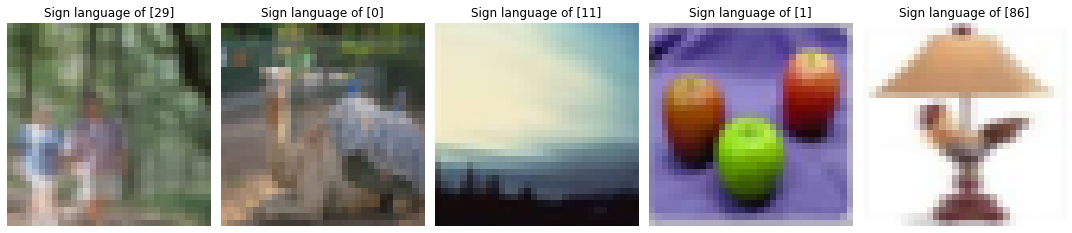

In [20]:
plt.figure(figsize=(15,5))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(sub_X_test[i,:,:],cmap='gray')
  plt.title('Sign language of {}'.format(Y_train[i]))
  plt.axis('off')
  plt.tight_layout()
plt.show()

#### Table for confusion

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

In [22]:
logreg.score(sub_X_test_rshp,sub_Y_test) ## Overall accuracy score of the logistic regression model

0.2279591836734694

In [23]:
lr_cm=confusion_matrix(y_pred,sub_Y_test) ## To obtain the confusion matrix
print(classification_report(y_pred,sub_Y_test))

print()
print("Execution Time %s seconds: " % (time.time() - lr_start_time))

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       131
           1       0.31      0.24      0.27       127
           2       0.08      0.09      0.09        88
           3       0.09      0.14      0.11        63
           4       0.05      0.08      0.06        65
           5       0.17      0.14      0.15       120
           6       0.19      0.17      0.18       110
           7       0.32      0.28      0.30       114
           8       0.17      0.22      0.19        76
           9       0.32      0.26      0.28       125
          10       0.09      0.10      0.10        86
          11       0.14      0.14      0.14        99
          12       0.26      0.26      0.26       101
          13       0.22      0.18      0.20       123
          15       0.13      0.17      0.15        75
          16       0.18      0.26      0.21        70
          17       0.43      0.30      0.36       142
          18       0.33    

In [24]:
lr_cm

array([[48,  2,  7, ...,  4,  0,  0],
       [ 7, 31,  3, ...,  2,  3,  0],
       [ 3,  3,  8, ...,  0,  0,  0],
       ...,
       [ 1,  1,  1, ..., 56,  1,  0],
       [ 0,  3,  1, ...,  0, 33,  0],
       [ 0,  2,  0, ...,  0,  1, 44]])

In [25]:
f1_test = f1_score(y_pred, sub_Y_test, average='weighted')
print( "Test f1 score:", f1_test)

Test f1 score: 0.23771743796819145


In [28]:
y_pred

array([12,  2, 40, ..., 35, 30, 20])

### Structure Predictions method

We procceed to create execute the Structure predictions method in order to identify differences and get some conclusions.

In [29]:
from stpredictions.models.IOKR.model import IOKR

In [30]:
sub_X_test_rshp.shape

(4900, 3072)

In [31]:
sp_start_time= time.time()

In [34]:
clf = IOKR()
clf.verbose = 1
L = 1e-5
#Just using a quantity of 100 due to a shape problem 
clf.fit(X=sub_X_train_rshp[0:100], Y=sub_Y_train[0:100], L=L, input_kernel='linear')
Y_pred_test = clf.predict(X_test=sub_X_test_rshp[0:10000], Y_candidates=sub_Y_test)
#f1_test_st = f1_score(Y_pred_test, Y_test, average='weighted')
#print( "Test f1 score:", f1_test_st)
print(Y_pred_test[1])

Fitting time: 0.1670691967010498 in s
Decoding time: 0.3664553165435791 in s
[0]


In [35]:
sp_cm=confusion_matrix(Y_pred_test,sub_Y_test) ## To obtain the confusion matrix
print(classification_report(Y_pred_test,sub_Y_test))

print()
print("Execution Time %s seconds: " % (time.time() - sp_start_time))

              precision    recall  f1-score   support

           0       0.09      0.02      0.04       397
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00    

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
Y_pred_test

array([[49],
       [ 0],
       [49],
       ...,
       [49],
       [49],
       [ 0]])

In [37]:
sub_Y_test

array([[49],
       [33],
       [15],
       ...,
       [16],
       [30],
       [42]])

### Random Forest method

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_start_time = time.time()

In [39]:
sub_X_train = X_train.astype('float32')
sub_X_test = X_test.astype('float32')

In [40]:
print(sub_X_train.shape[0], 'train samples')
print(sub_X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [41]:
# fit a RandomForest model to the data
model = RandomForestClassifier(n_estimators = 10)

In [42]:
sub_Y_train = sub_Y_train.flatten()
sub_Y_test = sub_Y_test.flatten()

# normalize the datasets
sub_X_train /= 255.
sub_X_test /= 255.

In [43]:
model.fit(sub_X_train_rshp, sub_Y_train)
print(model)

RandomForestClassifier(n_estimators=10)


In [44]:
cv_results = cross_val_score(model, sub_X_train_rshp, sub_Y_train,
                cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)

#model.fit(sub_X_train, sub_Y_train)

print(); print(cv_results)
#print(); print(model)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   35.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   36.4s finished



[0.16261224 0.15828571]


In [45]:
# make predictions
expected_y  = sub_Y_test
predicted_y = model.predict(sub_X_test_rshp)

In [47]:
# summarize the fit of the model
print(); print(classification_report(expected_y, predicted_y))
#print(); print(metrics.confusion_matrix(expected_y, predicted_y))

print()
print("Execution Time %s seconds: " % (time.time() - rf_start_time))   


              precision    recall  f1-score   support

           0       0.22      0.57      0.31       100
           1       0.17      0.45      0.24       100
           2       0.07      0.17      0.10       100
           3       0.08      0.16      0.11       100
           4       0.12      0.19      0.14       100
           5       0.07      0.12      0.09       100
           6       0.17      0.25      0.21       100
           7       0.15      0.21      0.18       100
           8       0.11      0.11      0.11       100
           9       0.24      0.27      0.25       100
          10       0.07      0.06      0.06       100
          11       0.12      0.11      0.12       100
          12       0.11      0.13      0.12       100
          13       0.13      0.10      0.11       100
          15       0.07      0.06      0.06       100
          16       0.25      0.23      0.24       100
          17       0.31      0.45      0.36       100
          18       0.14   

In [48]:
rf_cm=confusion_matrix(predicted_y,sub_Y_test) ## To obtain the confusion matrix
rf_cm

array([[57,  6,  8, ...,  3,  5,  1],
       [ 5, 45,  5, ...,  2,  5,  2],
       [ 2,  3, 17, ...,  2,  3,  1],
       ...,
       [ 0,  0,  0, ..., 39,  0,  1],
       [ 0,  1,  1, ...,  0, 15,  0],
       [ 0,  0,  1, ...,  0,  1, 30]])

In [49]:
predicted_y

array([17, 23, 10, ..., 22, 30,  2])